
# Chapter 1 Exercises

In [1]:
import pyro.distributions as dist
import seaborn as sns
from matplotlib import pyplot as plt
import torch

In [2]:
datas = [
    ["W", "W", "W"],
    ["W", "W", "W", "L"],
    ["L", "W", "W", "L", "W", "W", "W"],
]

In [3]:
def get_posterior(data, p_grid, prior):

    nW = data.count("W")
    nL = data.count("L")

    likelihood = (
        dist.Binomial(total_count=float(nW + nL), probs=p_grid)
        .log_prob(torch.tensor(float(nW)))
        .exp()
    )

    posterior = likelihood * prior
    posterior = posterior / torch.sum(posterior)

    return posterior


## 2E1
(2), (4)

## 2E2
(3)

## 2E3
(1), (4)

## 2E4
Tossing the globe is not actually random. However the deterministic processes that determines whether it lands on water or land are very complicated and determining and describing this process is very difficult. Hence to do something useful we treat the outcome of the globe toss as effectively random to obtain some information about the globe.

## 2M1

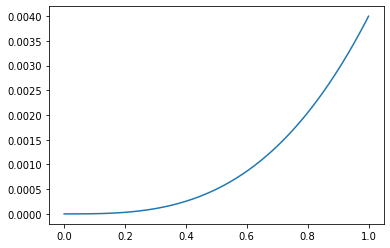

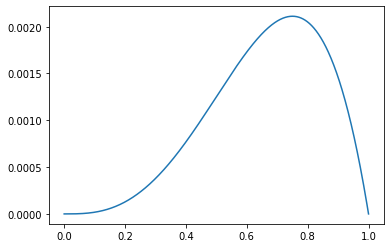

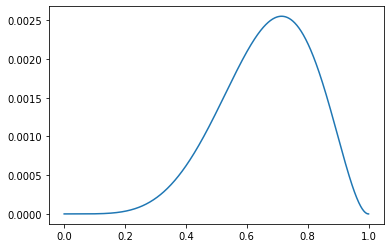

In [4]:
n = 1000
p_grid = torch.linspace(0.0, 1.0, n)
prior = torch.tensor(1.0).repeat(n)

for data in datas:
    fig, ax = plt.subplots()
    posterior = get_posterior(
        data, p_grid, prior
    )
    sns.lineplot(
        x=torch.linspace(0.0, 1.0, 1000), y=posterior, ax=ax
    )

## 2M2

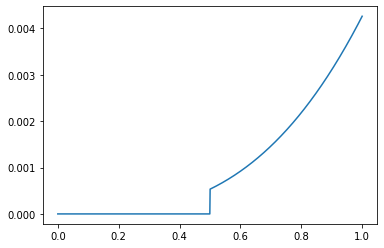

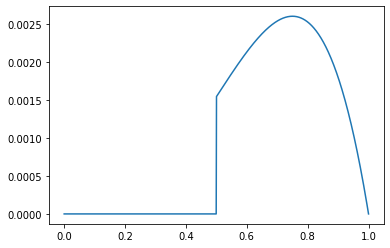

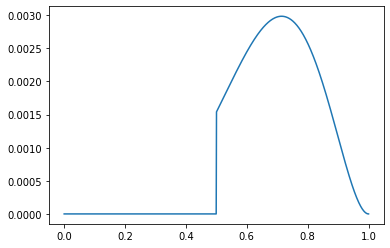

In [5]:
n = 1000
p_grid = torch.linspace(0.0, 1.0, n)
prior = prior = torch.tensor([0.0 if p < 0.5 else 2.0 for p in p_grid])

for data in datas:
    fig, ax = plt.subplots()
    posterior = get_posterior(
        data, p_grid, prior
    )
    sns.lineplot(
        x=torch.linspace(0.0, 1.0, 1000), y=posterior, ax=ax
    )


## 2M3
```
P(Earth | land) = P(land | Earth) P(Earth)/P(land)
```
```
P(land) = P(land | Earth) P(Earth) + P(land | Mars) P(Mars)
P(land) = 0.3*0.5  + 1*0.5
P(land) = 0.65
```
```
P(Earth | land) = 0.3*0.5/0.65
P(Earth | land) = 0.2307
```

## 2M4
- Let `B` represent the number of black sides on the drawn card.
- Let `SS` represent the the shown side of the drawn card.
```
P(B=2 | SS=Black) = 2/N
P(B=1 | SS=Black) = 1/N
P(B=0 | SS=Black) = 0/N
```
```
2/N + 1/N + 0/N = 1
N = 3
```
```
P(B=2 | SS=Black) = 2/3
P(B=1 | SS=Black) = 1/3
P(B=0 | SS=Black) = 0
```

## 2M5
```
P(B=2 | SS=Black) = 4/N
P(B=1 | SS=Black) = 1/N
P(B=0 | SS=Black) = 0/N
```
```
4/N + 1/N + 0/N = 1
N = 5
```
```
P(B=2 | SS=Black) = 4/5
P(B=1 | SS=Black) = 1/5
P(B=0 | SS=Black) = 0/5
```

## 2M6
```
P(B=2 | SS=Black) = 2*1/N
P(B=1 | SS=Black) = 1*2/N
P(B=0 | SS=Black) = 0*3/N
```
```
2/N + 2/N + 0/N = 1
N = 4
```
```
P(B=2 | SS=Black) = 1/2
P(B=1 | SS=Black) = 1/2
P(B=0 | SS=Black) = 0
```

## 2M7
- Let `SSFC` represent the shown side of the first drawn card.
- Let `SSSC` represent the shown side of the second drawn card.
- Let `FB` represent the number of black sides on the first drawn card.
- Let `SB` represent the number of black sides on the second drawn card.
```
P(FB=0, SB=1 | SSFC=Black, SSSC=White) = 0*1/N 
P(FB=0, SB=2 | SSFC=Black, SSSC=White) = 0*0/N
P(FB=1, SB=0 | SSFC=Black, SSSC=White) = 1*2/N
P(FB=1, SB=2 | SSFC=Black, SSSC=White) = 1*0/N
P(FB=2, SB=0 | SSFC=Black, SSSC=White) = 2*2/N
P(FB=2, SB=1 | SSFC=Black, SSSC=White) = 2*1/N
```
```
0/N + 0/N + 2/N + 0/N + 4/N + 2/N = 1
N=8
```
```
P(FB=2 | SSFC=Black, SSSC=White) = P(FB=2, SB=0 | SSFC=Black, SSSC=White) + P(FB=2, SB=1 | SSFC=Black, SSSC=White)
P(FB=2 | SSFC=Black, SSSC=White) = 4/8 + 2/8
P(FB=2 | SSFC=Black, SSSC=White) = 3/4
```

## 2H1
- Let `FB` represent the outcome of the first birth from the panda. 
- Let `SB` represent the outcome of the second birth from the panda.
```
P(FB=Twins| A) = 0.1
P(FB=Twins | B) = 0.2 
```
```
P(SB=Twins | FB=Twins) = P(FB=Twins, SB=Twins)/P(FB=Twins)
```
```
P(FB=Twins) = P(FB=Twins | A) P(A) + P(FB=Twins | B) P(B)
P(FB=Twins) = 0.15
```
```
P(FB=Twins, SB=Twins) = P(FB=Twins, SB=Twins|A) P(A) + P(FB=Twins, SB=Twins | B) P(B) 
P(FB=Twins, SB=Twins) = 0.1*0.1*0.5 + 0.2*0.2*0.5 = 0.025
P(SB=Twins | FB=Twins) = 0.025/0.15 
P(SB=Twins | FB=Twins) = 0.1666
```
## 2H2
```
P(A | FB=Twins) = P(FB=Twins | A) P(A)/P(FB=Twins)
P(A | FB=Twins) = 0.1*0.5/0.15
P(A | FB=Twins) = 0.33333
```

## 2H3
```
P(A | SB=Single, FB=Twins) = P(SB=Single | A, FB=Twins) P(A | FB=Twins)/P(SB=Single | FB=Twins) 
```
```
P(SB=Single | FB=Twins) = 1 - P(SB=Twins | FB=Twins)
P(SB=Single | FB=Twins) = 1 - 0.1666
P(SB=Single | FB=Twins) = 0.8333
```
```
P(A | SB=Single, FB=Twins) = 0.9*0.3333/0.8333
P(A | SB=Single, FB=Twins) = 0.36
```

## 2H4
- Let `T` represent the outcome of the test.
```
P(T=A | A) = 0.8
P(T=B | B) = 0.65
```
```
P(A | T=A) = P(T=A | A) P(A)/P(T=A)
```
```
P(T=A) = P(T=A | A) P(A) + P(T=A | B) P(B)
P(T=A) = 0.8*0.5 + 0.35*0.5
P(T=A) = 0.575
```
```
P(A | T=A) = 0.8*0.5/0.575
P(A | T=A) = 0.6957
```
```
P(A | T=A, FB=Twins, SB=Single) = P(T=A | A FB=Twins, SB=Single) P(A | FB=Twins, SB=Single)/P(T=A | FB=Twins, SB=Single)
```
```
P(T=A | FB=Twins, SB=Single) = P(T=A | A, FB=Twins, SB=Single) P(A | FB=Twins, SB=Single) + P(T=A | B, FB=Twins, SB=Single) P(B | FB=Twins, SB=Single)
P(T=A | FB=Twins, SB=Single) = 0.8*0.36 + 0.35*0.64
P(T=A | FB=Twins, SB=Single) = 0.512
```
```
P(A | T=A, FB=Twins, SB=Single) = 0.8*0.36/0.512
P(A | T=A, FB=Twins, SB=Single) = 0.5625
```